In [1]:
## Making essential imports
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip "/content/drive/My Drive/anime-sketch-colorization.zip" -d "/content/drive/My Drive/Kaggle"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564058.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564079.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564096.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564099.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564122.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564138.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564145.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2564146.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2565003.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2565030.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2565039.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2565048.png  
  inflating: /content/drive/My Drive/Kaggle/data/trainB/2565060.png  
  inflating: /content/drive/My Drive/Ka

In [3]:
## defining a frame for image and mask storage
framObjTrain = {'img' : [],
           'mask' : []
          }

## defining data Loader function
def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 256):
    imgNames = os.listdir(imgPath)[0:1000]
    maskNames = []
    

    
    imgAddr = imgPath + '/'
    maskAddr = maskPath + '/'
    
    for i in  tqdm (range (len(imgNames))):
        img = plt.imread(imgAddr + imgNames[i])
        mask = plt.imread(maskAddr + imgNames[i])
        
        img = cv2.resize(img, (shape, shape)) 
        mask = cv2.resize(mask, (shape, shape))
        
        frameObj['img'].append(img[:,:,0])
        frameObj['mask'].append(mask)
        
    return frameObj

In [4]:
framObjTrain = LoadData( framObjTrain, imgPath = '/content/drive/My Drive/Kaggle/data/trainB'
                        , maskPath = '/content/drive/My Drive/Kaggle/data/trainA'
                         , shape = 256)

100%|██████████| 1000/1000 [18:36<00:00,  1.12s/it]


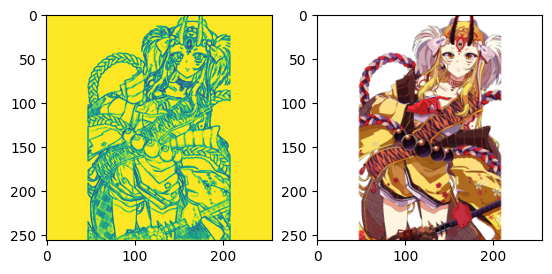

In [5]:
  ## displaying data loaded by our function
plt.subplot(1,2,1)
plt.imshow(framObjTrain['img'][27])
plt.subplot(1,2,2)
plt.imshow(framObjTrain['mask'][27])
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, UpSampling2D, BatchNormalization

model = Sequential([
    

    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2DTranspose(128, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2DTranspose(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2DTranspose(32, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_54 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_44 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_55 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                      

In [14]:
history = model.fit(np.array(framObjTrain['img']), np.array(framObjTrain['mask']), epochs = 50, verbose = 1)

Epoch 1/40
32/32 [==============================] - 23s 441ms/step - loss: 0.6367 - accuracy: 0.2736
Epoch 2/40
32/32 [==============================] - 14s 448ms/step - loss: 0.4956 - accuracy: 0.2870
Epoch 3/40
32/32 [==============================] - 14s 441ms/step - loss: 0.3411 - accuracy: 0.2933
Epoch 4/40
32/32 [==============================] - 14s 435ms/step - loss: 0.2885 - accuracy: 0.3364
Epoch 5/40
32/32 [==============================] - 14s 434ms/step - loss: 0.2757 - accuracy: 0.3937
Epoch 6/40
32/32 [==============================] - 14s 438ms/step - loss: 0.2714 - accuracy: 0.4412
Epoch 7/40
32/32 [==============================] - 14s 436ms/step - loss: 0.2680 - accuracy: 0.4956
Epoch 8/40
32/32 [==============================] - 14s 439ms/step - loss: 0.2630 - accuracy: 0.5249
Epoch 9/40
32/32 [==============================] - 14s 437ms/step - loss: 0.2606 - accuracy: 0.5397
Epoch 10/40
32/32 [==============================] - 14s 436ms/step - loss: 0.2580 - accura

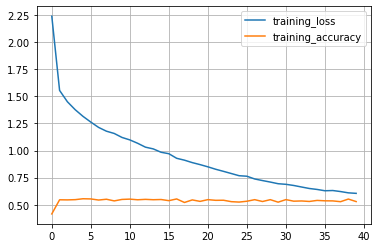

In [ ]:
plt.plot(retVal.history['loss'], label = 'training_loss')
plt.plot(retVal.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.grid(True)

In [17]:
img = framObjTrain['img']
mask = framObjTrain['mask']
mask = mask[0:16]
imgProc = img [0:16]
imgProc = np.array(img)
    
predictions = model.predict(imgProc)
for i in range(len(predictions)):
  predictions[i] = cv2.merge((predictions[i,:,:,0],predictions[i,:,:,1],predictions[i,:,:,2]))


32/32 [==============================] - 4s 127ms/step


In [19]:
def plotgraph(img,predMask,groundTruth):
  plt.figure(figsize=(20,10))
      
  plt.subplot(1,3,1)
  plt.imshow(img, cmap = 'gray')
  plt.title('grey scale')
      
      ## Adding Image sharpening step here
      ## it is a sharpening filter
  filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]) 
  imgSharpen = cv2.filter2D(predMask,-1,filter)
      
  plt.subplot(1,3,2)
  plt.imshow(imgSharpen)
  plt.title('Predicted colored ')
      
  plt.subplot(1,3,3)
  plt.imshow(groundTruth)
  plt.title('actual colored')

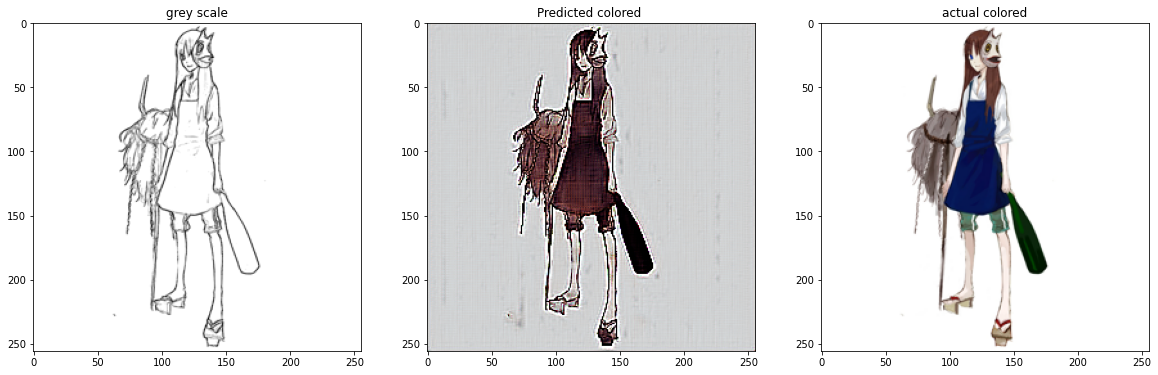

In [ ]:
Plotter(actuals[2], sixteenPrediction[2], masks[2])

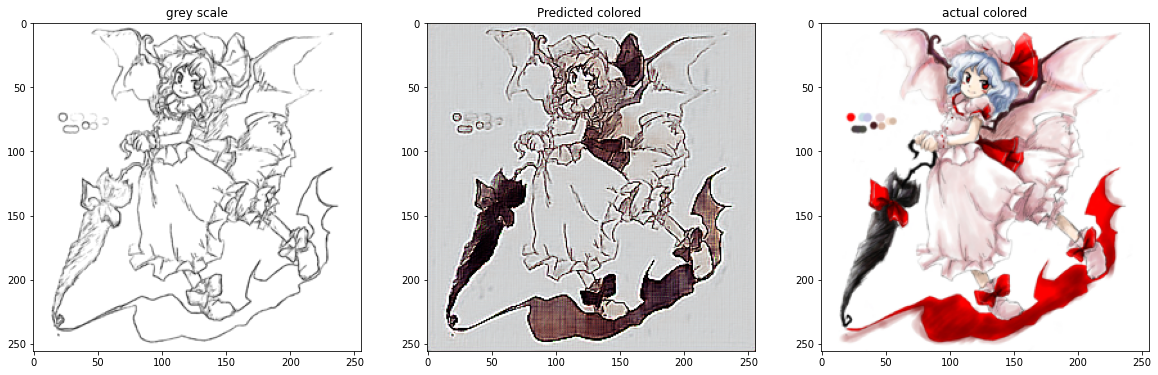

In [ ]:
Plotter(actuals[3], sixteenPrediction[3], masks[3])

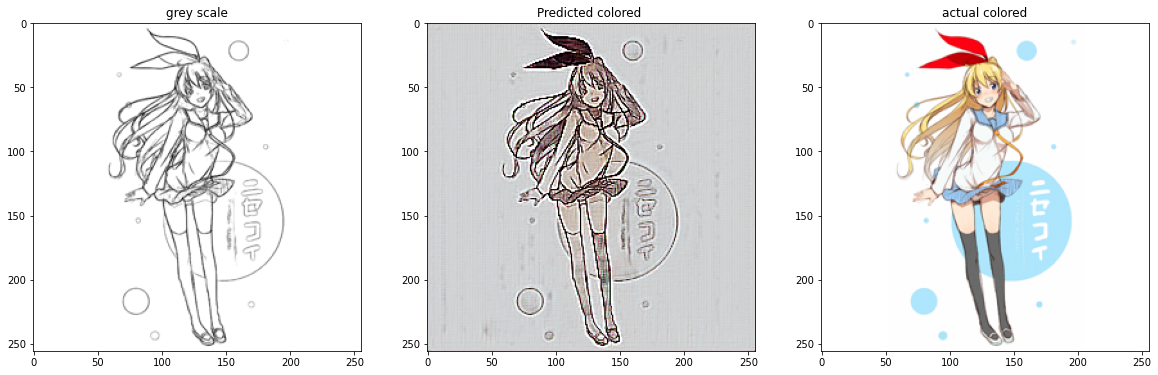

In [ ]:
Plotter(actuals[4], sixteenPrediction[4], masks[4])

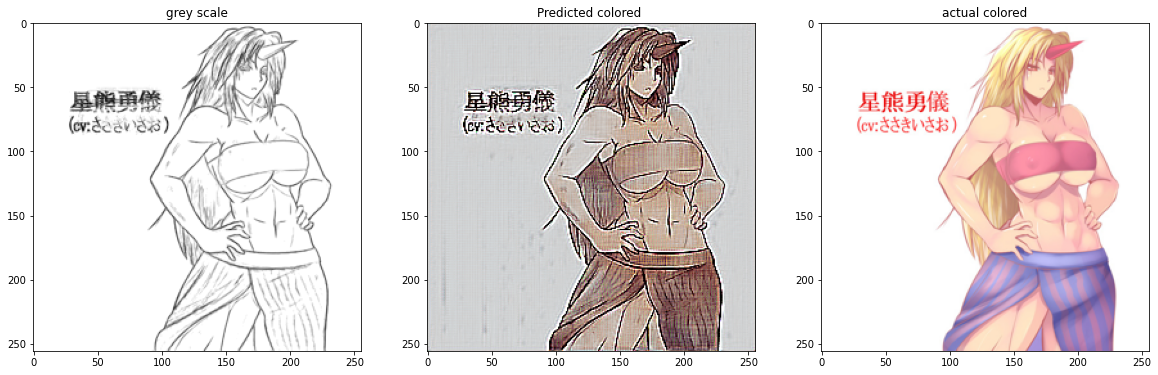

In [ ]:
Plotter(actuals[5], sixteenPrediction[5], masks[5])

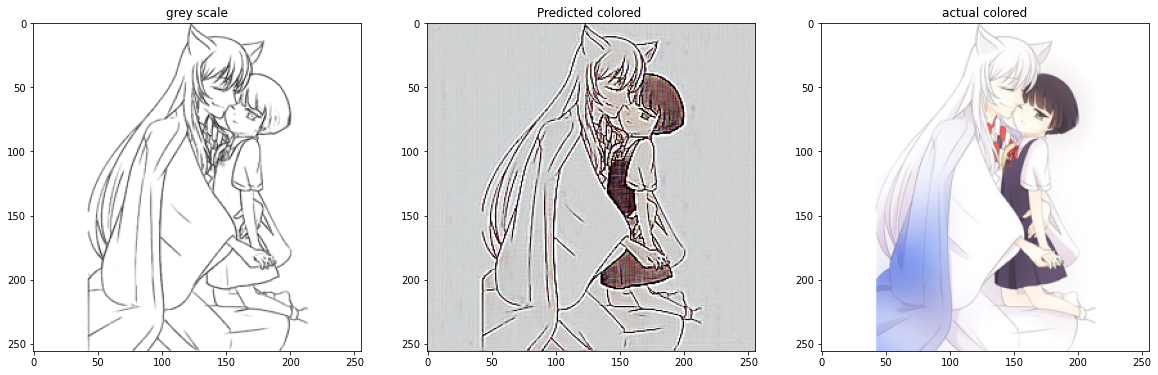

In [ ]:
Plotter(actuals[6], sixteenPrediction[6], masks[6])

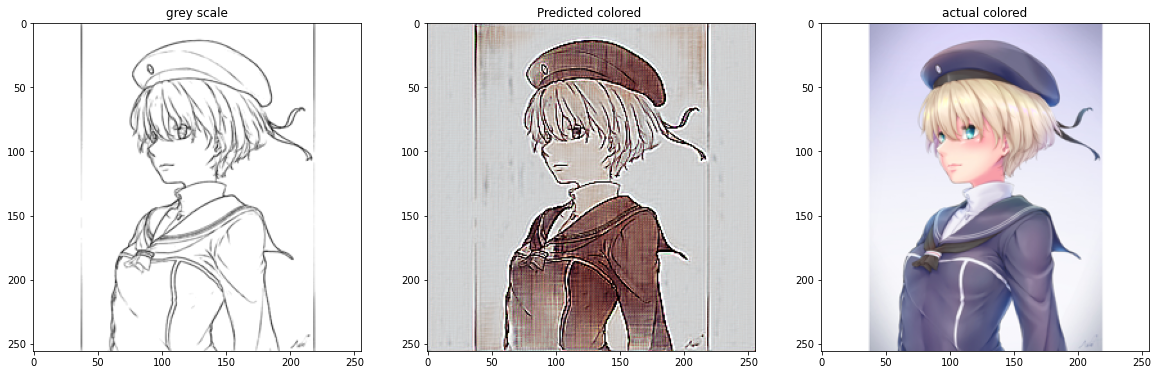

In [ ]:
Plotter(actuals[7], sixteenPrediction[7], masks[7])

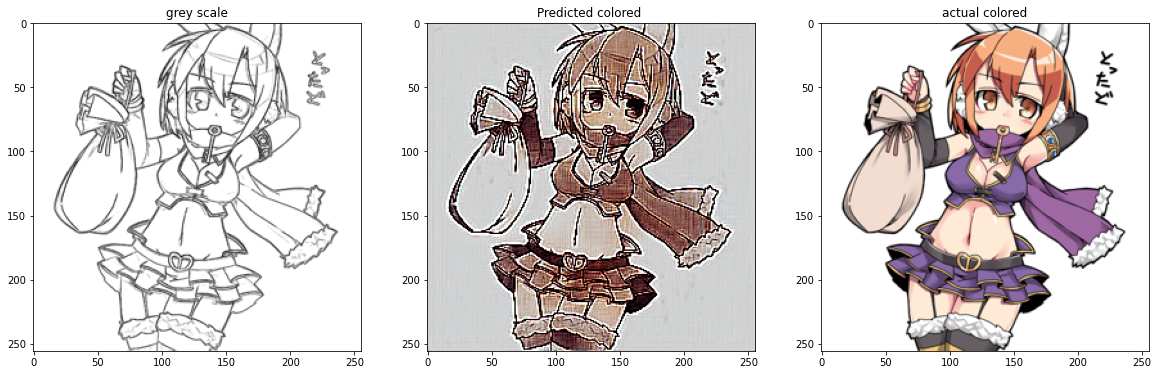

In [ ]:
Plotter(actuals[12], sixteenPrediction[12], masks[12])